# Homework 5: Mini-project


Task Description: You are working for a non-profit that is recruiting student volunteers to help with Alzheimer’s patients. You have been tasked with predicting how suitable a person is for this task by predicting how empathetic he or she is.

We make use of the Young People	Survey dataset, please find the link to the dataset below:
https://www.kaggle.com/miroslavsabo/young-people-survey/

Predict a person’s “empathy” on a scale from 1 to 5.



Imports:

In [204]:
import pandas
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Part 1: a) Cleaning the data


Here, we'll clean up the data firstly in order to remove unnecessary values.

For replacing NAN values we simply find the NAN values and replace them by the column median:

In [205]:
dataset = pandas.read_csv('responses.csv')

#fill up with median
dataset = dataset.fillna(dataset.median(axis=0))

#Storing the values to perform data visualization in  a later step
gender_values = dataset[['Gender']].values
empathy_values = dataset[['Empathy']].values
music_values = dataset[['Music']]

music_values = music_values.values
emp_valuesforline = np.squeeze(empathy_values)
music_valuesforline = np.squeeze(music_values)

# Part 1: b) Applying one hot encoding on the categorical values


Categorical variables are converted into a form that could be provided to the ML algorithm to do a better job in prediction.

In [206]:
# Applying one hot encoding on Categorical values
dataset = pandas.get_dummies(dataset, columns=['Punctuality','Alcohol','Smoking', 'Lying', 'Internet usage', 'Gender','Left - right handed','Education','Only child','Village - town','House - block of flats'])

Now we drop the Empathy column since it has to be predicted and hence not to be used for prediction

Y has empathy in it, since it has to be predicted. X has all the values except for empathy, thus I make use of all the other columns except for Empathy to predict the Empathy.

In [207]:
Y = dataset[['Empathy']]
X = dataset.drop(['Empathy'], axis=1)

# Part 2: Pie Chart to visualize the data
        
By looking at the pie chart below one can analyze the distribution of empathy between Males and Females. I have considered the values greater than or equal to 4 to be empathetic. Thus, from the plot below one can infer the Empathy distribution of Males and Females in the dataset

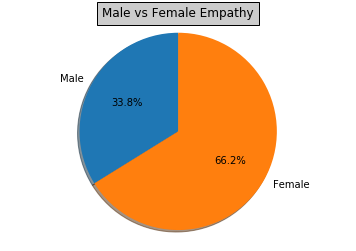

In [208]:
import matplotlib.pyplot as plt

ma_empathetic = 0
fe_empathetic = 0


for i,value in enumerate(gender_values):
    if(value == 'male' and empathy_values[i]>=4):
        ma_empathetic += 1
    elif(value == 'female' and empathy_values[i]>=4):
        fe_empathetic += 1

labels = ['Male','Female']
sizes = [ma_empathetic, fe_empathetic]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Male vs Female Empathy', bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Part 3: Selecting the best features to predict Empathy

Here, we select the best features by using the training data in order to predict Empathy by using Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes contribute the most to predicting the target attribute. Below we use RFE with the logistic regression algorithm to select the top 141 features from the given set of features.


You can further change the values of the number of attributes being used for predicition and find out how changing the number of attributes affects the accuracy of the model

In [209]:
model = LogisticRegression()
rfe = RFE(model, 141)
fit = rfe.fit(X, Y)
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 141
Selected Features: [ True  True  True  True  True  True  True  True False  True False False
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True False  True False  True  True
  True  True False  True False False False  True  True  True  True  True
  True  True  True False False  True  True  True False False False  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True False False  True  True False  True  True  True  True
 False  True False  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True False False False False  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
  True  True  

In the feature ranking list above the features that are ranked 1 are found out by using RFE. I have set the value as 141 features by experimentation on the validation data.

Now, below I append the index of the selected elements by checking the columns ranked 1 which can be found using the fit.ranking_ call 

In [210]:
#Find the index of the columns that are ranked 1
count = 0
val_index = []
for x in np.nditer(fit.ranking_):
    if(x==1):
        val_index.append(count)
    count+=1

#Add the column names to the list corresponding to the indices that are stored  
pos = 0
top_feat = []
for i,k in enumerate(X):
    if(i==val_index[pos]):
        top_feat.append(k)
        if(pos == len(val_index)-1):
            break
        pos+=1

You can check the top attributes found using RFE below:

In [211]:
print(top_feat)

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Metal or Hardrock', 'Reggae, Ska', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Medicine', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Musical instruments', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Darkness', 'Heights', 'Spiders', 'Dangerous dogs', 'Fear of public speaking', 'Healthy eating', 'Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Se

Adding the top selected values to the variable X 

In [212]:
X = dataset[top_feat]

# Part 4: Splitting the data into train test and validation

Splitting the data into train test and development. I have made use of the development data to tune the hyperparameters below by performing cross validation and also trying out different values of parameters in order to find out which parameters work best for prediction.

In [213]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.25,random_state=26)
        
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)

# Part 5: Correlation plot

As it can be seen that the feature Music is one of the top ranked features in the list above and so we plot the Music with Empathy to visualize why they are so highly correlated

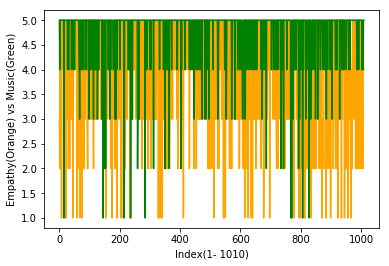

In [215]:
from matplotlib.pyplot import subplots, show

list1 = music_valuesforline.tolist()
list2 = emp_valuesforline.tolist()
x = range(1010)

fig, ax = subplots()
ax.plot(x, list2,color='orange')
ax.plot(x,list1,color='green')
ax.set_xlabel("Index(1- 1010)")
ax.set_ylabel("Empathy(Orange) vs Music(Green)")
show()

It can be seen that the values of Empathy and Music are pretty close to each other for the given index(1-1010 which correspond to column numbers in the csv file). 

Higher values of empathy correspond to a higher value of 'I like listening to music' and similarly certain lower values correspond as well, which is the reason why the two features are very well correlated.

# Part 6: Using cross validation to compare a few models

The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way. The following methods are evaluated:<br></br><br></br>
1.LogisticRegression <br></br>
2.LinearDiscriminantAnalysis<br></br>
3.KNeighborsClassifier<br></br>
4.DecisionTreeClassifier<br></br>
5.GaussianNB<br></br>
6.SVC<br></br>
7.Ensemble

Below I have plotted the box and whisker plots to compare the models

LR: 0.342083 (0.106073)
LDA: 0.196250 (0.142819)
KNN: 0.309167 (0.088541)
CART: 0.302500 (0.084476)
NB: 0.235417 (0.103099)
SVM: 0.387500 (0.138306)
Ensemble: 0.320417 (0.116077)


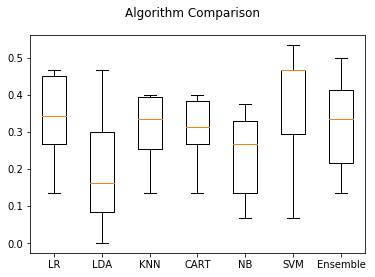

In [219]:
import warnings
warnings.simplefilter("ignore")


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
models.append(('Ensemble', VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')))

seed = 7
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_val, Y_val, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We can see above that SVM outperforms all the other models while using the <b> Validation data </b> and thus we make use of SVM in order to find out the accuracy of the model on the test data.

# Part 7: Applying SVC on test data


Thus, by applying SVC I got an accuracy of 45.84%

In [217]:
model = SVC()
model = model.fit(X_train, Y_train)
predictions=model.predict(X_test)
print(model.score(X_test, Y_test))

0.45849802371541504
